# (1) Import Libraries and Loading Data

In [12]:
# Example code from dataset website

# Import Libraries
import numpy as np
import pandas as pd
from scipy import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [14]:
# Load Data

# In Files tab, go to mount google drive, and there is a folder in the shared project folder with data.
# If you right click the file you can copy the folder path

folder = '/content/drive/MyDrive/Comp562Project/Data' ## may be different for you
### In order to see shared files, you might have to right click on the project folder and "add shortcut to drive"


# Label Data: Each of 12060 sample has results for 12 different toxicological assays.
# Result is 0 or 1 for each assay (or NA if there is no result).
y_tr = pd.read_csv(folder + '/tox21_labels_train.csv.gz', index_col=0, compression="gzip")
y_te = pd.read_csv(folder + '/tox21_labels_test.csv.gz', index_col=0, compression="gzip")

# Dense Sample Features: There are 801 features for each sample
x_tr_dense = pd.read_csv(folder + '/tox21_dense_train.csv.gz', index_col=0, compression="gzip").values
x_te_dense = pd.read_csv(folder + '/tox21_dense_test.csv.gz', index_col=0, compression="gzip").values

# (2) Initial Attempts at various classification models

In [ ]:
# General Structure to train a model for one assay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Select which assay you are testing
target = y_tr.columns[0]

# For each assay, find rows with labels that have a value (not NaN)
rows_tr = np.isfinite(y_tr[target])
rows_te = np.isfinite(y_te[target])

# Select and fit model
rf = RandomForestClassifier(n_estimators=100,  n_jobs=4)
rf.fit(x_tr_dense[rows_tr], y_tr[target][rows_tr]) # Slices features/labels to rows that have values

# Use model to predict labels based off test set
acc_random_forest = round(rf.score(x_te_dense[rows_te], y_te[target][rows_te]) * 100, 2)
acc_random_forest

90.82

In [ ]:
# Random Forest for Dense Sample Features
from sklearn.ensemble import RandomForestClassifier

acc_rf = [] # Stores % Accuracy for each assay
auc_rf = [] # Store ROC Area Under Curve for each Assay

# Build a model for each assay
for target in y_tr.columns:
    # Find sample rows that have values (not NaN)
    rows_tr = np.isfinite(y_tr[target])
    rows_te = np.isfinite(y_te[target])

    # Select Model and Fit to data
    rf = RandomForestClassifier(n_estimators=100,  n_jobs=4)
    rf.fit(x_tr_dense[rows_tr], y_tr[target][rows_tr]) # Slices features/labels to only rows that have values

    # Calculate Accuracy
    acc_rf.append(round(rf.score(x_te_dense[rows_te], y_te[target][rows_te]) * 100, 2))

    # Calculate ROC AUC
    p_te = rf.predict_proba(x_te_dense[rows_te])
    auc_rf.append(roc_auc_score(y_te[target][rows_te], p_te[:,1]))

    # Print assay name, acc, and auc
    print("%15s: %3.5f, %3.5f" % (target, acc_rf[-1], auc_rf[-1]))

         NR.AhR: 90.49000, 0.89578
          NR.AR: 97.95000, 0.67632
      NR.AR.LBD: 98.28000, 0.71875
   NR.Aromatase: 92.80000, 0.76414
          NR.ER: 91.67000, 0.76934
      NR.ER.LBD: 97.17000, 0.74987
  NR.PPAR.gamma: 94.71000, 0.71319
         SR.ARE: 84.14000, 0.76443
       SR.ATAD5: 93.89000, 0.76593
         SR.HSE: 96.56000, 0.76175
         SR.MMP: 90.06000, 0.91228
         SR.p53: 93.34000, 0.77699


In [ ]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

acc_knn = []
auc_knn = []

for target in y_tr.columns:
    # Put labels in np arrays
    rows_tr = np.isfinite(y_tr[target])
    rows_te = np.isfinite(y_te[target])

    knn = KNeighborsClassifier(n_neighbors = 3) 
    knn.fit(x_tr_dense[rows_tr], y_tr[target][rows_tr])  

    acc_knn.append(round(knn.score(x_te_dense[rows_te], y_te[target][rows_te]) * 100, 2))

    p_te = knn.predict_proba(x_te_dense[rows_te])
    auc_knn.append(roc_auc_score(y_te[target][rows_te], p_te[:,1]))

    print("%15s: %3.5f, %3.5f" % (target, acc_knn[-1], auc_knn[-1]))

         NR.AhR: 85.08000, 0.68377
          NR.AR: 97.27000, 0.59248
      NR.AR.LBD: 98.11000, 0.53996
   NR.Aromatase: 89.58000, 0.61942
          NR.ER: 85.85000, 0.63186
      NR.ER.LBD: 95.67000, 0.61444
  NR.PPAR.gamma: 94.21000, 0.53009
         SR.ARE: 77.30000, 0.56988
       SR.ATAD5: 92.28000, 0.55534
         SR.HSE: 94.75000, 0.59848
         SR.MMP: 83.43000, 0.63066
         SR.p53: 90.75000, 0.57451


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

acc_gnb = []
#auc_gnb = []

for target in y_tr.columns:
    rows_tr = np.isfinite(y_tr[target]).values
    rows_te = np.isfinite(y_te[target]).values

    gnb = GaussianNB() 
    gnb.fit(x_tr_dense[rows_tr], y_tr[target][rows_tr])

    acc_gnb.append(round(gnb.score(x_te_dense[rows_te], y_te[target][rows_te]) * 100, 2))

    #p_te = gnb.predict_proba(x_te_dense[rows_te])
    #auc_gnb.append(roc_auc_score(y_te[target][rows_te], p_te[:,1]))

    print("%15s: %3.5f" % (target, acc_gnb[-1]))

         NR.AhR: 11.97000
          NR.AR: 2.05000
      NR.AR.LBD: 1.37000
   NR.Aromatase: 7.39000
          NR.ER: 9.88000
      NR.ER.LBD: 3.33000
  NR.PPAR.gamma: 5.12000
         SR.ARE: 16.76000
       SR.ATAD5: 6.11000
         SR.HSE: 3.61000
         SR.MMP: 11.05000
         SR.p53: 6.66000


In [ ]:
# Not sure why Gaussian Naive Bayes is giving accuracies closer to 0 %, but we can subtract from 100 to get the accuracy of the inverse prediction
for i in range(len(acc_gnb)):
  acc_gnb[i] = 100.0 - acc_gnb[i]

In [ ]:
# Decision Tree for Dense Sample Features
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

acc_dt = []
auc_dt = []

for target in y_tr.columns:
    rows_tr = np.isfinite(y_tr[target])
    rows_te = np.isfinite(y_te[target])
    dt = DecisionTreeClassifier()
    dt.fit(x_tr_dense[rows_tr], y_tr[target][rows_tr])
    acc_dt.append(round(dt.score(x_te_dense[rows_te], y_te[target][rows_te]) * 100, 2))
    p_te = dt.predict_proba(x_te_dense[rows_te])
    auc_dt.append(roc_auc_score(y_te[target][rows_te], p_te[:, 1]))
    print("%15s: %3.5f, %3.5f" % (target, acc_dt[-1], auc_dt[-1]))

         NR.AhR: 84.92000, 0.72414
          NR.AR: 95.22000, 0.60714
      NR.AR.LBD: 97.25000, 0.61629
   NR.Aromatase: 87.69000, 0.55600
          NR.ER: 85.27000, 0.61739
      NR.ER.LBD: 93.17000, 0.57638
  NR.PPAR.gamma: 90.91000, 0.50880
         SR.ARE: 76.94000, 0.60606
       SR.ATAD5: 90.51000, 0.60504
         SR.HSE: 89.67000, 0.64015
         SR.MMP: 85.82000, 0.69351
         SR.p53: 86.04000, 0.51750


In [ ]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

acc_sgd = []
#auc_sgd = []

for target in y_tr.columns:
    # Put labels in np arrays
    rows_tr = np.isfinite(y_tr[target]).values
    rows_te = np.isfinite(y_te[target]).values

    sgd = SGDClassifier(max_iter=5, tol=None) 
    sgd.fit(x_tr_dense[rows_tr], y_tr[target][rows_tr])

    acc_sgd.append(round(sgd.score(x_te_dense[rows_te], y_te[target][rows_te]) * 100, 2))

    #p_te = sgd.predict_proba(x_te_dense[rows_te])
    #auc_sgd.append(roc_auc_score(y_te[target][rows_te], p_te[:,1]))

    print("%15s: %3.5f" % (target, acc_sgd[-1]))

         NR.AhR: 88.03000
          NR.AR: 97.95000
      NR.AR.LBD: 98.63000
   NR.Aromatase: 92.61000
          NR.ER: 90.12000
      NR.ER.LBD: 96.67000
  NR.PPAR.gamma: 94.88000
         SR.ARE: 83.24000
       SR.ATAD5: 93.89000
         SR.HSE: 96.39000
         SR.MMP: 88.95000
         SR.p53: 93.34000


In [ ]:
# Perceptron for Dense Sample Features
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_auc_score

acc_pc = []

for target in y_tr.columns:
    rows_tr = np.isfinite(y_tr[target]).values
    rows_te = np.isfinite(y_te[target]).values
    pc = Perceptron(max_iter=2000)
    pc.fit(x_tr_dense[rows_tr], y_tr[target][rows_tr])
    acc_pc.append(round(pc.score(x_te_dense[rows_te], y_te[target][rows_te]) * 100, 2))
    print("%15s: %3.5f" % (target, acc_pc[-1]))

         NR.AhR: 88.03000
          NR.AR: 97.95000
      NR.AR.LBD: 98.63000
   NR.Aromatase: 92.61000
          NR.ER: 90.12000
      NR.ER.LBD: 96.67000
  NR.PPAR.gamma: 94.88000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


         SR.ARE: 83.24000
       SR.ATAD5: 93.89000
         SR.HSE: 96.39000
         SR.MMP: 88.95000
         SR.p53: 93.34000


In [ ]:
# Logistic Regression for Dense Sample Features
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

acc_lr = []
auc_lr = []

for target in y_tr.columns:
    rows_tr = np.isfinite(y_tr[target]).values
    rows_te = np.isfinite(y_te[target]).values

    lr = LogisticRegression()
    lr.fit(x_tr_dense[rows_tr], y_tr[target][rows_tr])

    acc_lr.append(round(lr.score(x_te_dense[rows_te], y_te[target][rows_te]) * 100, 2))

    p_te = lr.predict_proba(x_te_dense[rows_te])
    auc_lr.append(roc_auc_score(y_te[target][rows_te], p_te[:, 1]))
    print("%15s: %3.5f, %3.5f" % (target, acc_lr[-1], auc_lr[-1]))

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import roc_auc_score

acc_svc = []
#auc_svc = []

for target in y_tr.columns:
    rows_tr = np.isfinite(y_tr[target]).values
    rows_te = np.isfinite(y_te[target]).values

    svc = LinearSVC()
    svc.fit(x_tr_dense[rows_tr], y_tr[target][rows_tr])

    acc_svc.append(round(svc.score(x_te_dense[rows_te], y_te[target][rows_te]) * 100, 2))

    #p_te = svc.predict_proba(x_te_dense[rows_te])
    #auc_svc.append(roc_auc_score(y_te[target][rows_te], p_te[:, 1]))
    print("%15s: %3.5f" % (target, acc_svc[-1]))

## Report Accuracies for Initial models

In [ ]:
report_accs = [acc_rf, acc_knn, acc_dt, acc_lr, acc_svc]
models = ["Random Forest", "K Nearest Neighbors", "Decision Tree", "Logistic Regression", "Support Vector Machines"]

# Calculates average accuracy of each assay
acc_avg = []
for i in range(len(acc_rf)):
  total = sum(acc[i] for acc in report_accs)
  mean = total/len(report_accs)
  acc_avg.append(mean)
report_accs.append(acc_avg)

df = pd.DataFrame(report_accs, columns = list(y_tr.columns) + ["Average"], index = models + ["Average"])
df

,NR.AhR,NR.AR,NR.AR.LBD,NR.Aromatase,NR.ER,NR.ER.LBD,NR.PPAR.gamma,SR.ARE,SR.ATAD5,SR.HSE,SR.MMP,SR.p53,Average
Random Forest,90.490,97.950,98.280,92.800,91.670,97.170,94.710,84.140,93.890,96.560,90.060,93.340,93.421667
K Nearest Neighbors,85.080,97.270,98.110,89.580,85.850,95.670,94.210,77.300,92.280,94.750,83.430,90.750,90.356667
Decision Tree,84.920,95.220,97.250,87.690,85.270,93.170,90.910,76.940,90.510,89.670,85.820,86.040,88.617500
Logistic Regression,88.030,97.950,98.630,92.610,90.120,96.670,94.880,83.240,93.890,96.390,88.950,93.340,92.891667
Support Vector Machines,57.210,96.080,95.190,92.610,62.020,95.330,91.900,83.060,93.090,4.100,88.770,71.100,77.538333
Average,81.146,96.894,97.492,91.058,82.986,95.602,93.322,80.936,92.732,76.294,87.406,86.914,88.565167


In [ ]:
df.to_csv('/content/drive/MyDrive/Comp562Project/intitial_model_accuracies.csv')

### Notes/Observations from this Section:
* Random Forest and Logistic Regression models provided the best average accuracy. Random forest trained much faster than Logistic Regression. Logistic Regression requires many iterations to converge on this data set.
* Move forward with Random Forest
* The SR.ARE assay has low accuracy for all models



# (3) K-Fold Cross Validation with Random Forest

Objective of this section: Get a more realistic idea of the accuracy of the Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

mean_scores = [] # Contains mean score from cross validation 
dev_scores = [] # Contains st dev of scores from cross validation

# Build a model for each assay
for target in y_tr.columns:
    # Find sample rows that have values (not NaN)
    rows_tr = np.isfinite(y_tr[target])
    rows_te = np.isfinite(y_te[target])

    # Combine Test and Training Data
    x = np.vstack((x_tr_dense[rows_tr], x_te_dense[rows_te]))
    y = np.concatenate((y_tr[target][rows_tr], y_te[target][rows_te]))

    # Select Model and Use Cross Validation
    rf = RandomForestClassifier(n_estimators=100)
    scores = cross_val_score(rf, x, y, cv=10, scoring = "accuracy")

    print("%15s Scores:" % (target))
    print(scores)

    mean_scores.append(scores.mean())
    dev_scores.append(scores.std())

In [ ]:
df = pd.DataFrame([mean_scores, dev_scores], columns = list(y_tr.columns), index = ["Average Score", "Standard Deviation"])
df.to_csv('/content/drive/MyDrive/Comp562Project/k_fold_scores_1.csv')
df

# (4) Feature Deletion

In [44]:
# Random Forest for Dense Sample Features
from sklearn.ensemble import RandomForestClassifier

feature_importance = np.zeros(801) # Collects the importance of each feature (0-801) across all assays

# Build a model for each assay
for target in y_tr.columns:

  # Find sample rows that have values (not NaN)
  rows_tr = np.isfinite(y_tr[target])
  rows_te = np.isfinite(y_te[target])

  # Select Model and Fit to data
  rf = RandomForestClassifier(n_estimators=100,  n_jobs=4)
  rf.fit(x_tr_dense[rows_tr], y_tr[target][rows_tr]) # Slices features/labels to only rows that have values

  feature_importance = np.add(feature_importance, rf.feature_importances_)

In [45]:
importances = pd.DataFrame({'feature':np.arange(0,801),'importance':np.round(feature_importance,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances.head(15)) ## Shows 15 most important features
# Next Step: train a model with 400 most important features, then 500, 600, 700 most important etc

     feature  importance
221      221       0.056
122      122       0.049
37        37       0.048
206      206       0.044
96        96       0.044
238      238       0.044
33        33       0.042
24        24       0.041
288      288       0.038
191      191       0.037
39        39       0.036
261      261       0.035
83        83       0.034
205      205       0.034
38        38       0.033


In [46]:
# List of feature number in order of importance (more important to less important)
most_important_features = importances['feature'].tolist()
# Next Step: train a model with 400 most important features, then 500, 600, 700 most important etc

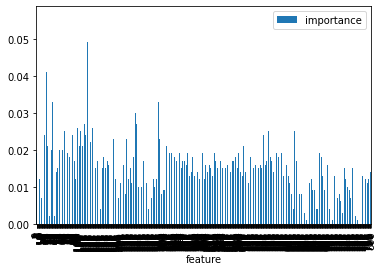

In [47]:
importances1 = pd.DataFrame({'feature':np.arange(0,801),'importance':np.round(feature_importance,3)})
ax = importances1.plot.bar(x='feature', y='importance')
# x-axis should be feature number, y-axis is relative importance
# Try to figure out how to make the x-axis look nicer (like a)

In [73]:
# Random Forest for Dense Sample Features
from sklearn.ensemble import RandomForestClassifier

acc_rf_features = [] # Stores % Accuracy for each assay
feature_num = []

# Build a model for each assay
for num_features in range(500, 801, 50):
  acc_rf = []
  feature_num.append(num_features)
  print(num_features)
  for target in y_tr.columns:
      # Find sample rows that have values (not NaN)
      rows_tr = np.isfinite(y_tr[target])
      rows_te = np.isfinite(y_te[target])

      # Select Model and Fit to data
      rf = RandomForestClassifier(n_estimators=100,  n_jobs=4)
      rf.fit(x_tr_dense[rows_tr][:,most_important_features[:num_features]], y_tr[target][rows_tr]) # Slices features/labels to only rows that have values

      # Calculate Accuracy
      acc_rf.append(round(rf.score(x_te_dense[rows_te][:,most_important_features[:num_features]], y_te[target][rows_te]) * 100, 2))

      # Print assay name, acc, and auc
      print("%15s: %3.5f" % (target, acc_rf[-1))

  acc_rf_features.append(sum(acc_rf)/len(acc_rf))

500
         NR.AhR: 90.66000, 0.89772
          NR.AR: 97.95000, 0.89772
      NR.AR.LBD: 98.28000, 0.89772
   NR.Aromatase: 92.80000, 0.89772
          NR.ER: 91.47000, 0.89772
      NR.ER.LBD: 97.17000, 0.89772
  NR.PPAR.gamma: 94.88000, 0.89772
         SR.ARE: 84.32000, 0.89772
       SR.ATAD5: 94.05000, 0.89772
         SR.HSE: 96.72000, 0.89772
         SR.MMP: 90.06000, 0.89772
         SR.p53: 93.34000, 0.89772
550
         NR.AhR: 90.49000, 0.89772
          NR.AR: 97.95000, 0.89772
      NR.AR.LBD: 98.28000, 0.89772
   NR.Aromatase: 92.80000, 0.89772
          NR.ER: 91.28000, 0.89772
      NR.ER.LBD: 97.17000, 0.89772
  NR.PPAR.gamma: 94.88000, 0.89772
         SR.ARE: 83.78000, 0.89772
       SR.ATAD5: 94.37000, 0.89772
         SR.HSE: 96.39000, 0.89772
         SR.MMP: 90.61000, 0.89772
         SR.p53: 93.51000, 0.89772
600
         NR.AhR: 90.49000, 0.89772
          NR.AR: 97.95000, 0.89772
      NR.AR.LBD: 98.28000, 0.89772
   NR.Aromatase: 92.61000, 0.89772
        

In [89]:
df = pd.DataFrame([np.round(acc_rf_features,4)], columns = feature_num, index = ["Accuracy"])
df

,500,550,600,650,700,750,800
Accuracy,93.475,93.4592,93.4333,93.4058,93.4767,93.4908,93.6008


In [87]:
feature_num

[500, 550, 600, 650, 700, 750, 800]

# (4b) Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Select which assay you are testing
target = y_tr.columns[0]
  
rows_tr = np.isfinite(y_tr[target])
rows_te = np.isfinite(y_te[target])

rf = RandomForestClassifier(n_estimators=100,  n_jobs=4)

param_grid = { "min_samples_leaf" : [10, 25], 
              "min_samples_split" : [12, 16], 
              "n_estimators": [400, 700]}

grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=5)

grid.fit(x_tr_dense[rows_tr], y_tr[target][rows_tr])

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'min_samples_leaf': 10, 'min_samples_split': 16, 'n_estimators': 400} with a score of 0.89


# (5) ROC AUC Curve

In [90]:
# Code to make a ROC AUC Curve. Rerun later once model is tuned
# Random Forest for Dense Sample Features
from sklearn.ensemble import RandomForestClassifier
auc_rf = [] # Store ROC Area Under Curve for each Assay

# Build a model for each assay
for target in y_tr.columns:
    # Find sample rows that have values (not NaN)
    rows_tr = np.isfinite(y_tr[target])
    rows_te = np.isfinite(y_te[target])

    # Select Model and Fit to data
    rf = RandomForestClassifier(n_estimators=100,  n_jobs=4)
    rf.fit(x_tr_dense[rows_tr], y_tr[target][rows_tr]) # Slices features/labels to only rows that have values

    # Calculate ROC AUC
    p_te = rf.predict_proba(x_te_dense[rows_te])
    auc_rf.append(roc_auc_score(y_te[target][rows_te], p_te[:,1]))

    # Print assay name, acc, and auc
    print("%15s: %3.5f" % (target, auc_rf[-1]))

         NR.AhR: 0.90790
          NR.AR: 0.72641
      NR.AR.LBD: 0.73617
   NR.Aromatase: 0.75940
          NR.ER: 0.76532
      NR.ER.LBD: 0.74022
  NR.PPAR.gamma: 0.69242
         SR.ARE: 0.76691
       SR.ATAD5: 0.76138
         SR.HSE: 0.73373
         SR.MMP: 0.91567
         SR.p53: 0.77815


In [94]:
df = pd.DataFrame([auc_rf], columns = list(y_tr.columns), index = ["ROC AUC Score"])
df

,NR.AhR,NR.AR,NR.AR.LBD,NR.Aromatase,NR.ER,NR.ER.LBD,NR.PPAR.gamma,SR.ARE,SR.ATAD5,SR.HSE,SR.MMP,SR.p53
ROC AUC Score,0.907898,0.726408,0.736172,0.759399,0.765317,0.740216,0.692424,0.766909,0.761378,0.733728,0.915666,0.778155
